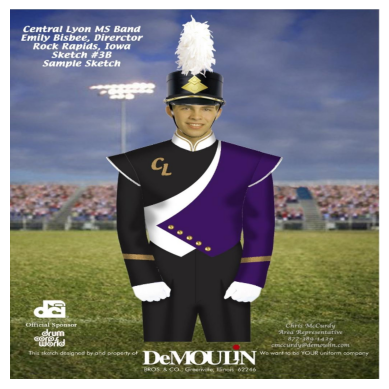

In [34]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt

# Пример изображения
image = cv2.imread('data/wider_face/data/WIDER_train/images/0--Parade/0_Parade_marchingband_1_849.jpg')

# Применение операции изменения размера
transform = A.Resize(width=640, height=640)
transformed = transform(image=image)
resized_image = transformed['image']

# Отображение изображения с помощью Matplotlib
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
import os
import shutil
import cv2
import albumentations as A
import matplotlib.pyplot as plt

root_directory = "data/wider_face"
destination = "data/wider_face_coco" # must contain val/ and train/ Both with images/ and labels/ folders


def _parse_annotation(mode='train'):
    global destination
    annotations = []
    if mode == 'train':
        annotation_file = os.path.join(root_directory, "data/wider_face_split/wider_face_train_bbx_gt.txt")
    elif mode == 'val':
        annotation_file = os.path.join(root_directory, "data/wider_face_split/wider_face_val_bbx_gt.txt")
    else:
        raise ValueError("mode is not correct")
    with open(annotation_file, 'r') as file:
        lines = file.readlines()
        i = 0
        length = len(lines)
        while i < length:
            image_path = lines[i].strip().split('/')
            # Загрузка изображения
            image = cv2.imread(os.path.join(root_directory, f'data/WIDER_{mode}/images', image_path[0], image_path[1]))
            # Получение размера изображения
            height, width, _ = image.shape

            num_faces = max(int(lines[i+1]), 1)
            faces = []
            for j in range(num_faces):
                face_info = lines[i+2+j].strip().split()
                faces.append(list(map(float, face_info)))
            annotations.append((image_path[1], (width, height), faces))
            i += num_faces + 2
            if i % 500 == 0:
                print(f"string index: {i} of {length}")
    print('parsed')
    return annotations

def _convert_to_relative_bbox(x, y, w, h, img_width, img_height):
    rel_cx = str(float((x + int(w/2)) / img_width))
    rel_cy = str(float((y + int(h/2)) / img_height))
    rel_w = str(float(w / img_width))
    rel_h = str(float(h / img_height))
    return rel_cx, rel_cy, rel_w, rel_h

def _save_bboxes_txt(annotations, mode='train'):
    global destination
    if mode == 'train':
        dst = os.path.join(destination, "train/labels")
    elif mode == 'val':
        dst = os.path.join(destination, "val/labels")
    else:
        raise ValueError("mode is not correct")
    for image_path, (img_width, img_height), faces in annotations:
        image_path = image_path.split('.')[0]
        with open(os.path.join(dst, f'{image_path}.txt'),'w') as bbox_file:
            for face in faces:
                x, y, width, height = _convert_to_relative_bbox(*face[:4], img_width, img_height)
                object_index = 0
                bbox_file.write(f"{object_index} {x} {y} {width} {height}\n")
                               
def _copy_images(source_dir, mode='train'):
    global destination
    if mode == 'train':
        source_dir = os.path.join(root_directory, "data/WIDER_train/images")
        destination_dir = os.path.join(destination, "train/images")
    elif mode == 'val':
        source_dir = os.path.join(root_directory, "data/WIDER_val/images")
        destination_dir = os.path.join(destination, "val/images")
    else:
        raise ValueError("mode is not correct")                          
    # Проверяем существование директории назначения
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)
    # Перебираем все папки в исходной директории
    for folder_name in os.listdir(source_dir):
        folder_path = os.path.join(source_dir, folder_name)
        # Проверяем, является ли текущий элемент папкой
        if os.path.isdir(folder_path):
            # Перебираем все файлы в текущей папке
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                # Проверяем, является ли текущий элемент файлом изображения
                if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                    # Копируем файл изображения в директорию назначения
                    shutil.copy(file_path, destination_dir)
    print('copied')



In [16]:
annotations = _parse_annotation('train')
_save_bboxes_txt(annotations, 'train')
_copy_images('train')
annotations = _parse_annotation('val')
_save_bboxes_txt(annotations, 'val')
_copy_images('val')
    

string index: 7500 of 185184
string index: 11500 of 185184
string index: 22000 of 185184
string index: 30000 of 185184
string index: 33500 of 185184
string index: 37500 of 185184
string index: 42000 of 185184
string index: 45500 of 185184
string index: 63000 of 185184
string index: 66000 of 185184
string index: 80000 of 185184
string index: 103500 of 185184
string index: 107500 of 185184
string index: 108000 of 185184
string index: 112500 of 185184
string index: 122000 of 185184
string index: 124500 of 185184
string index: 133000 of 185184
string index: 135000 of 185184
string index: 136500 of 185184
string index: 139500 of 185184
string index: 141000 of 185184
string index: 155500 of 185184
string index: 157000 of 185184
string index: 160000 of 185184
string index: 171500 of 185184
string index: 179000 of 185184
parsed
copied
string index: 4500 of 46160
string index: 18500 of 46160
string index: 37500 of 46160
string index: 38500 of 46160
string index: 44500 of 46160
string index: 460